In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,silhouette_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Importacion de los datos
train = pd.read_csv("data.csv")
train = train.drop(['url','course_id','course_title'],axis=1)
train.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [ ]:
train.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,profit,year,month,day
count,3.683000e+03,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3683.000000,3683.000000,3683.000000
mean,6.764546e+05,65.992398,3193.371165,156.448004,40.062178,2.402885e+05,2015.433342,6.162639,15.841162
std,3.437217e+05,60.985586,9498.231406,935.078241,50.366788,1.000760e+06,1.185920,3.379314,8.780906
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2011.000000,1.000000,1.000000
25%,4.077270e+05,20.000000,110.000000,4.000000,15.000000,1.567500e+03,2015.000000,3.000000,8.000000
50%,6.882440e+05,45.000000,911.000000,18.000000,25.000000,2.305000e+04,2016.000000,6.000000,16.000000
75%,9.617290e+05,95.000000,2537.500000,67.000000,45.000000,1.182600e+05,2016.000000,9.000000,23.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,2.431680e+07,2017.000000,12.000000,31.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

In [ ]:
train.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64

Antes de la exploracion de datos voy a convertir variables categoricas a numericas

In [ ]:
# Encode multiple categorical columns safely.
cols = ['content_duration', 'published_timestamp', 'subject', 'published_date', 'published_time']
for col in cols:
    # fill missing values to avoid errors during encoding
    train[col] = train[col].fillna('missing')
    # use a fresh LabelEncoder per column
    train[col] = LabelEncoder().fit_transform(train[col])

KeyError: ('content_duration', 'published_timestamp', 'subject', 'published_date', 'published_time')

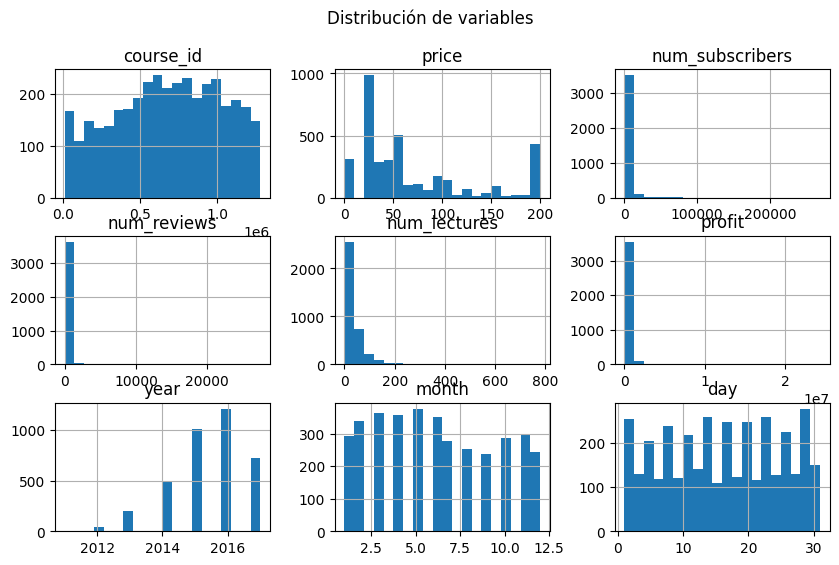

In [ ]:
#Exploracion de datos
train.hist(figsize=(10,6), bins=20)
plt.suptitle("Distribución de variables")
plt.show()

Aparentemente requeriria escalado Robusto

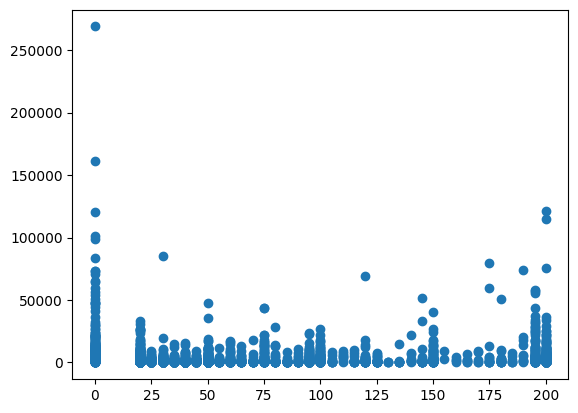

In [ ]:
plt.scatter(data=train,x='price',y='num_subscribers')

In [ ]:
sns.pairplot(train, hue="species")